In [63]:
#problem 1, part a
import numpy as np
from matplotlib import pyplot as plt
def quadratic(a,b,c):
    x_1 = ((-b) + np.sqrt(b**2 - 4*a*c))/(2*a)
    x_2 = ((-b) - np.sqrt(b**2 - 4*a*c))/(2*a)
    #part b
    x_3 = (2*c)/(-b + np.sqrt(b**2 - 4*a*c))
    x_4 = (2*c)/(-b - np.sqrt(b**2 - 4*a*c))
    return (x_1, x_2), (x_3, x_4)

#The two formulas do not give the same solutions but they are very close. Solutions x_1 and x_3
#give more precise solutions than x_2 and x_4. The reason x_1 and x_3 are more precise is because
#of the subtraction truncation that occurs. When  b^2 is approximately equal to 4*a*c, you need to use
#solution x_1 and x_3 because they add -b to the sqrt (not subtract it!). 

    
def complete_quadratic (a,b,c):

    if b**2-4*a*c < 0: #complex solutions
        x_1 = ((-b) + np.sqrt((b**2-4*a*c)+0j))/(2*a)
        x_2 = ((-b) - np.sqrt((b**2-4*a*c)+0j))/(2*a)
        return "No real solutions!", x_1,x_2
    elif b**2-4*a*c == 0:
        x_1 = ((-b) + np.sqrt(b**2 - 4*a*c))/(2*a) #could also use x_2 in quadratic function here because with a sqrt = 0
        #the subtraction won't matter. In fact, you could use any of the four methods as they all return the same root
        return x_1

    else:
        if b  <0:
            x_1 = ((-b) - np.sqrt(b**2 - 4*a*c))/(2*a)
            x_2 = (2*c)/(-b - np.sqrt(b**2 - 4*a*c))
        else: 
            x_1 = ((-b) + np.sqrt(b**2 - 4*a*c))/(2*a)
            x_2 = (2*c)/(-b + np.sqrt(b**2 - 4*a*c)) #method 3 from quadratic function gets rid of subtracting truncation
        return x_1,x_2

complete_quadratic(0.001,1000,0.001)

(-9.999894245993346e-07, -1000010.5755125057)

In [66]:
quadratic (1,-100,8)

((99.91993589739474, 0.08006410260526309),
 (0.08006410260525985, 99.9199358973907))

In [2]:
#problem 2
def f(x):
    return x**4-2*x+1

def simpson_rule(N,a,b):
    h = (b-a)/N
    odd = 0
    even = 0
    for k in range (1, N, 2):
        odd += f(a+k*h)
    for k in range (2,N,2):
        even += f(a+k*h)
    integral = 1/3*h*(f(a) + f(b) + 4*odd + 2*even)
    return integral
print("Simpson's Rule 10:" + "",simpson_rule(10, 0, 2))
print("Simpson's Rule 100:" + "",simpson_rule(100, 0, 2))
print("Simpson's Rule 1000:" + "",simpson_rule(1000, 0, 2))

Simpson's Rule 10: 4.400426666666667
Simpson's Rule 100: 4.400000042666667
Simpson's Rule 1000: 4.400000000004267


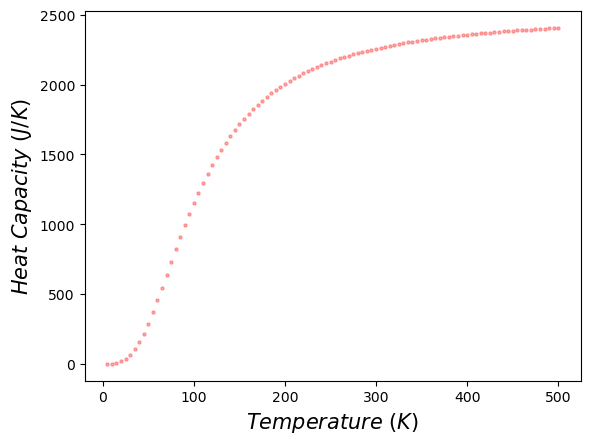

In [27]:
#problem 3
#using the trapezoidal rule function for the integral in this problem
def f(x):
    return (x**4 * np.exp(x))/((np.exp(x)-1)**2)



def cv(T): #temperature needs to be in kelvin
    debye = 428 #units of K
    N = 1000
    a = 0.0
    b = debye/T
    h = (b-a)/N
    number_density = 6.022*10**28 #units on m^-3
    k_b = 1.38064852*10**-23 #units of m^2 kg / s^2 K
    volume = 0.001 #units of m^3

    s = 0 + 0.5*f(b)
    for k in range(1,N):
        s +=f(k*h)
    integral = h*s 
    heat = (9*volume*number_density*k_b)*(T/debye)**3*integral
    return heat


fig = plt.figure()
ax = fig.add_subplot(111)

for temp in range (5,505,5):
    heat_capacity = cv(temp)
    ax.scatter(temp, heat_capacity, s=5, c='r', alpha=0.3)

ax.set_xlabel("$Temperature$ $(K)$", size=15)
ax.set_ylabel("$Heat$ $Capacity$ $( J/K)$", size=15)

plt.show()
